## Introduction ##
In today's business world, companies are looking for innovative approach to selling their products to thier customers. This requires involving targeted marketing for a more effective campaign. Data Analysis plays a critical role in this sector as involves building algorithms for customer segmentation and target marketing.

In general, this dataset contains marketing data can be used for 2 different business goals:

1. Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient.

2. Finding out customer segments, using data for customers, who subscribed to term deposit.This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.
Source : https://www.investopedia.com/terms/t/termdeposit.asp

The purpose of this project is to if the customers patronize the Term Deposit service after the campaign and the likely factors that affect their participation.


   # Bank Client Data:
   Input variables:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # Related With The Last Contact Of The Current Campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # Other Attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output Variable (Desired Target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

#Preprocessing and feature transformation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA



# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier as cb
from xgboost import XGBClassifier as xgb
from sklearn.dummy import DummyClassifier

# splitting data and model evaluation
from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV


In [ ]:
bank = pd.read_csv('/content/drive/MyDrive/data 1 (4)/data/bank.csv', sep = ';')

## Sanitary Checks

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
bank.shape

(4521, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
bank.duplicated().sum()

np.int64(0)

In [ ]:
bank.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Univariate Analysis ##

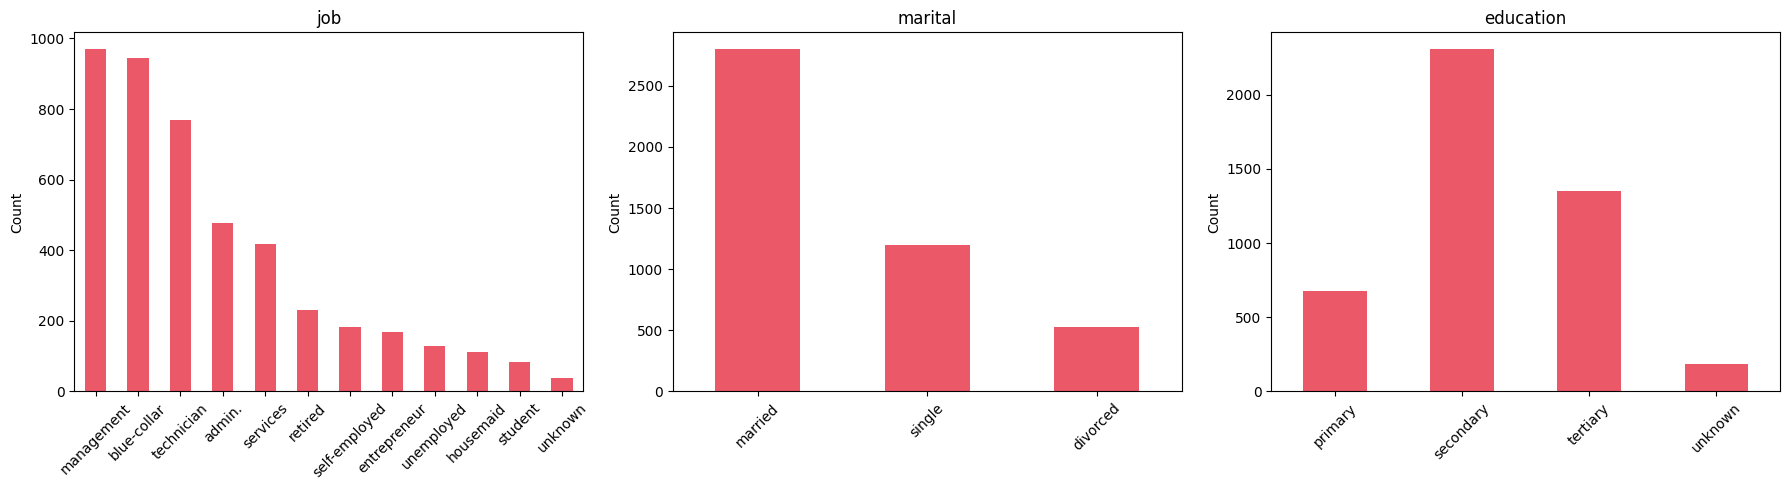

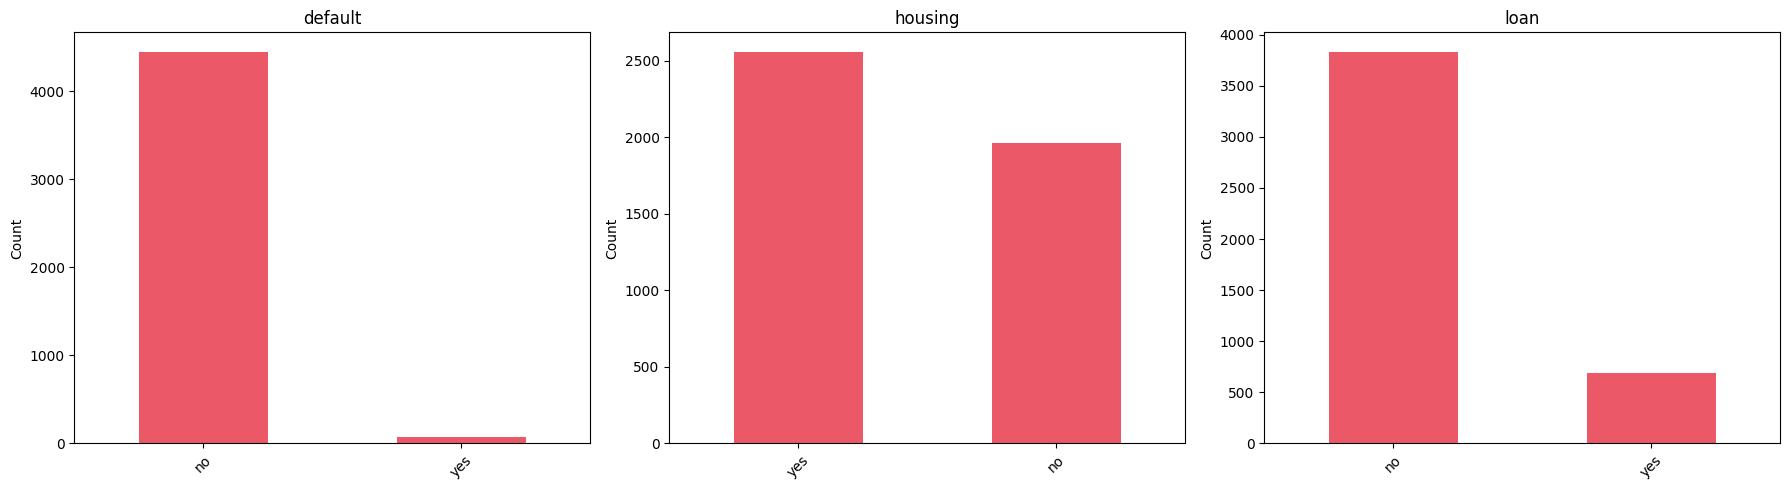

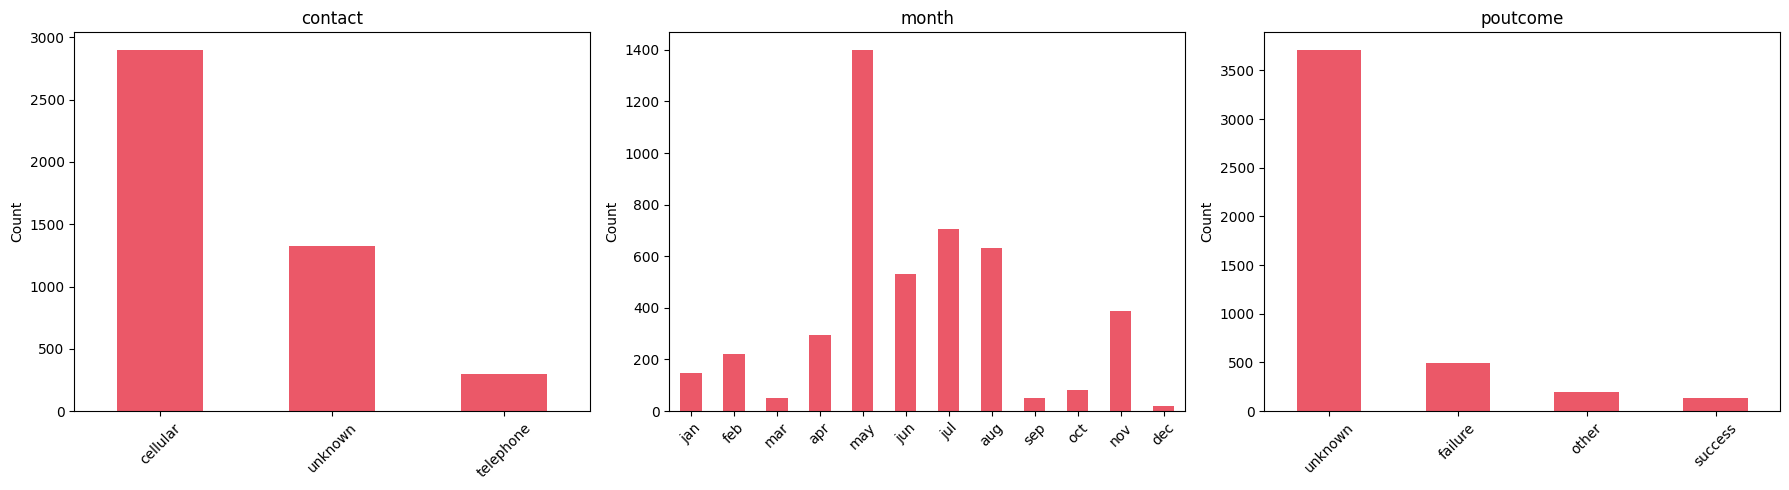

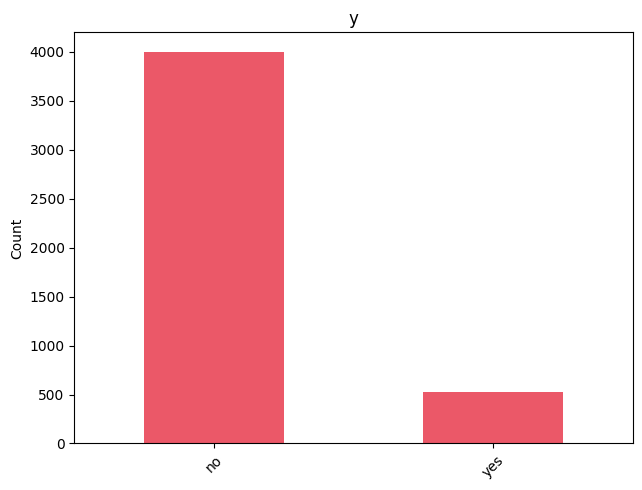

In [ ]:
# Auto-select categorical columns
categorical_cols = bank.select_dtypes(include=['object', 'category']).columns

# Define custom order for specific columns
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
education_order = ['primary', 'secondary', 'tertiary', 'unknown']

# Loop through categorical columns in chunks of 3
for i in range(0, len(categorical_cols), 3):
    subset = categorical_cols[i:i+3]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Handle case when there are fewer than 3 columns in the last row
    if len(subset) < 3:
        for j in range(3 - len(subset)):
            fig.delaxes(axes[-(j+1)])  # Remove unused axes

    for ax, col in zip(axes, subset):
        if col == 'month':
            month_counts = bank[col].value_counts().reindex(month_order)
            month_counts.plot(kind='bar', ax=ax, color="#EB5868")
        elif col == 'education':
            education_counts = bank[col].value_counts().reindex(education_order)
            education_counts.plot(kind='bar', ax=ax, color="#EB5868")
        else:
            bank[col].value_counts().plot(kind='bar', ax=ax, color="#EB5868")

        ax.set_title(col)
        ax.set_ylabel('Count')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

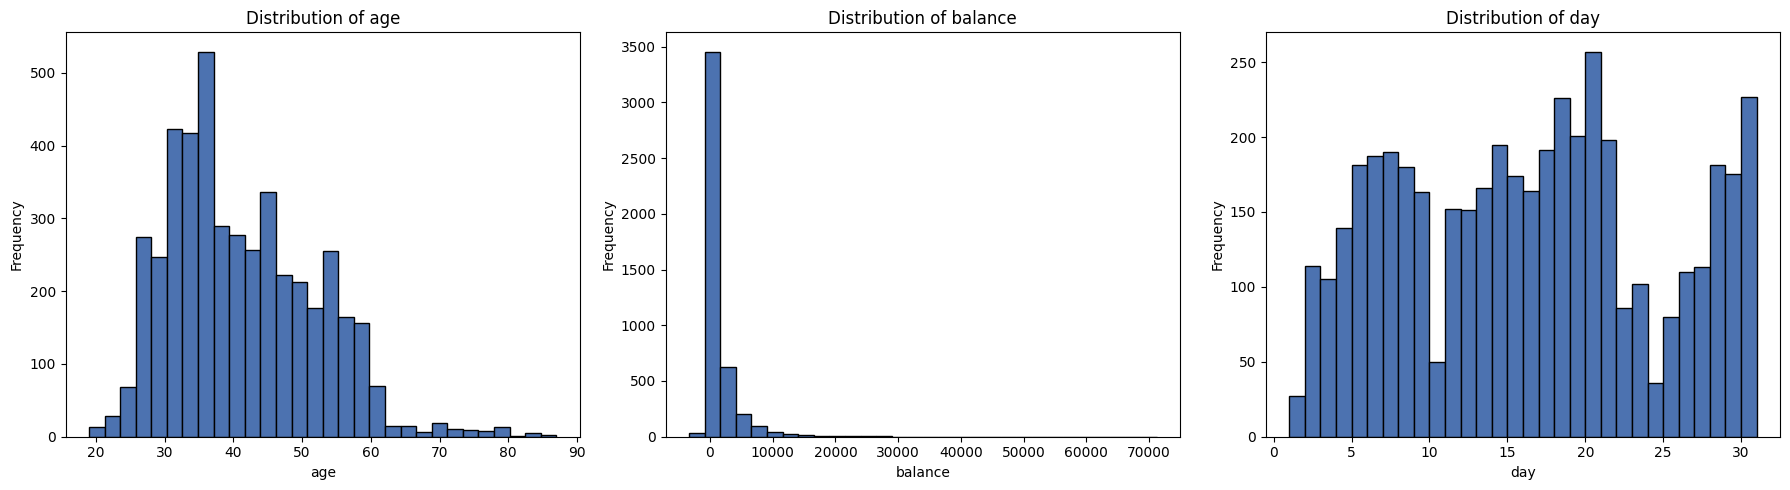

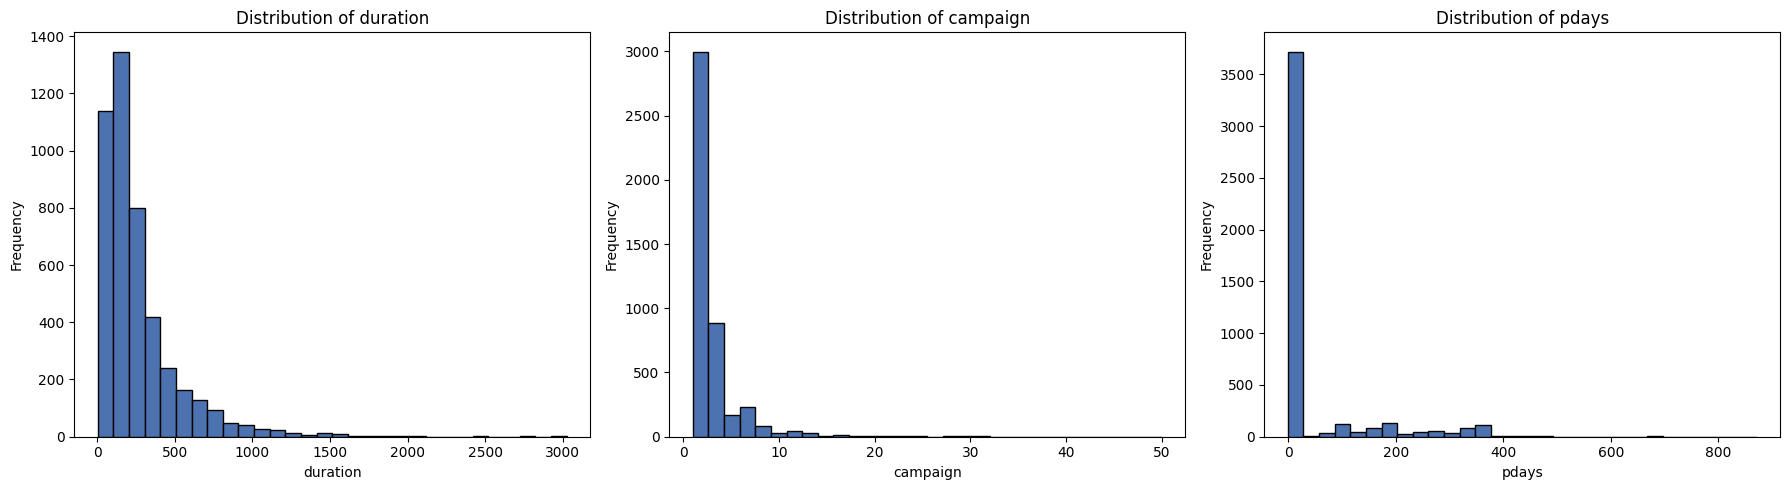

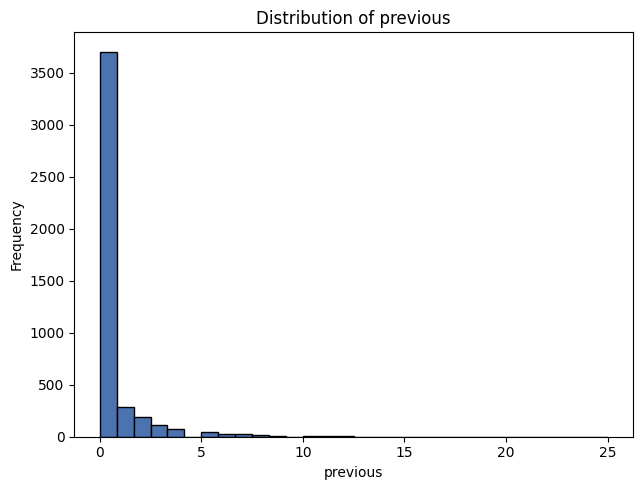

In [ ]:
# Automatically detect numerical columns
numerical_cols = bank.select_dtypes(include=['number']).columns

# Plot 3 histograms per figure
for i in range(0, len(numerical_cols), 3):
    subset = numerical_cols[i:i+3]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for ax, col in zip(axes, subset):
        bank[col].plot(kind='hist', bins=30, color="#4C72B0", ax=ax, edgecolor='black')
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Hide unused axes (if less than 3 columns in the last row)
    for ax in axes[len(subset):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()







## Bivariate Analysis

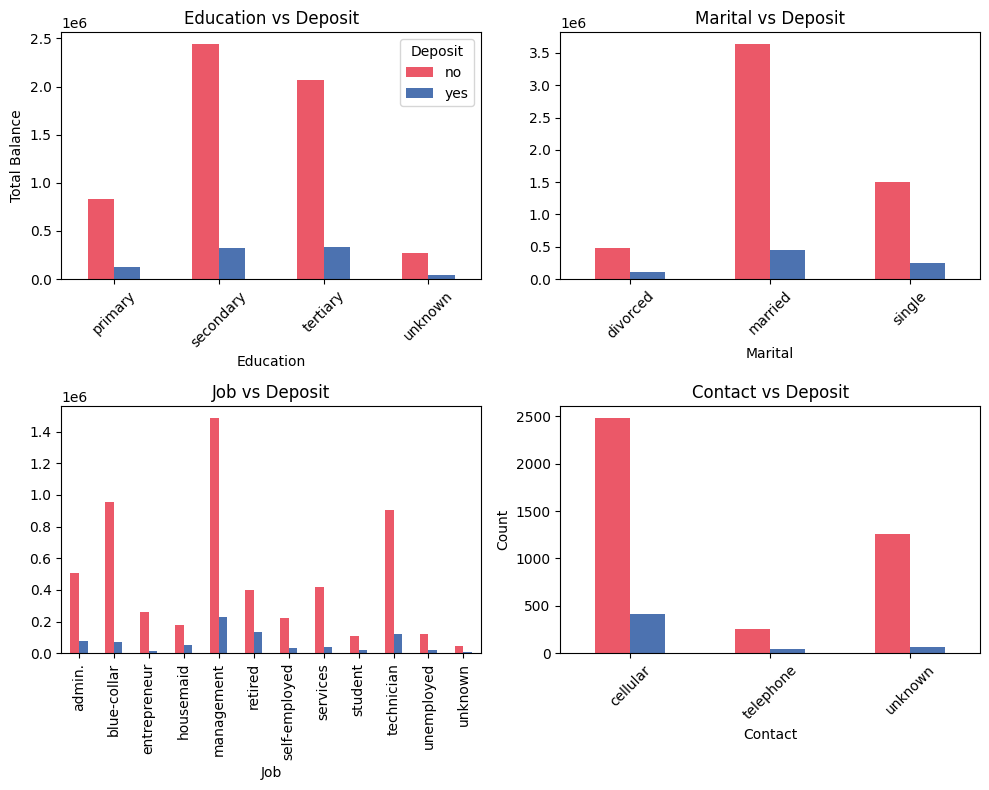

In [ ]:

# Set up the figure and 2x2 axes grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

# Colors for bars
colors = ["#EB5868", "#4C72B0"]

# Education
education_deposit = bank.groupby(['education', 'y'])['balance'].sum().unstack(fill_value=0)
education_deposit.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_title('Education vs Deposit')
axes[0, 0].set_xlabel('Education')
axes[0, 0].set_ylabel('Total Balance')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Deposit')

# Marital
marital_deposit = bank.groupby(['marital', 'y'])['balance'].sum().unstack(fill_value=0)
marital_deposit.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_title('Marital vs Deposit')
axes[0, 1].set_xlabel('Marital')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend().set_visible(False)

# Job
job_deposit = bank.groupby(['job', 'y'])['balance'].sum().unstack(fill_value=0)
job_deposit.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_title('Job vs Deposit')
axes[1, 0].set_xlabel('Job')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].legend().set_visible(False)

# Contact
contact_deposit = bank.groupby(['contact', 'y']).size().unstack(fill_value=0)
contact_deposit.plot(kind='bar', ax=axes[1, 1], color=colors)
axes[1, 1].set_title('Contact vs Deposit')
axes[1, 1].set_xlabel('Contact')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend().set_visible(False)

plt.tight_layout()
plt.show()


## Multivariable Analysis

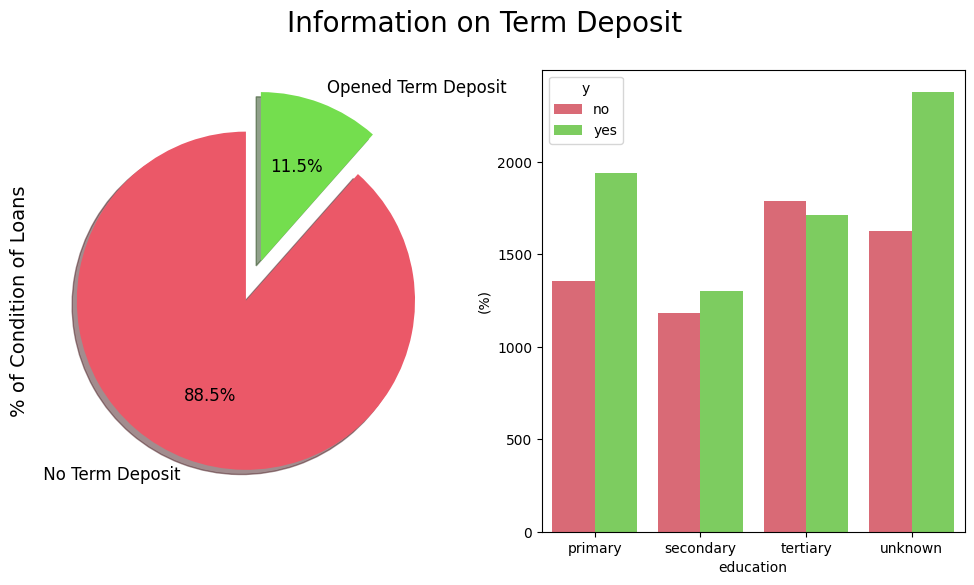

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,6))

colors = ["#EB5868", "#74DE4E"]
labels =" No Term Deposit", "Opened Term Deposit"
plt.suptitle('Information on Term Deposit', fontsize=20)
deposit_count= bank["y"].value_counts()
deposit_count.plot.pie(explode=[0,0.25], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels= labels, fontsize=12, startangle=90)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)


sns.barplot(x="education", y="balance", hue="y", data=bank, palette=colors, ci= None)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [ ]:
corr = bank.corr(numeric_only=True)
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


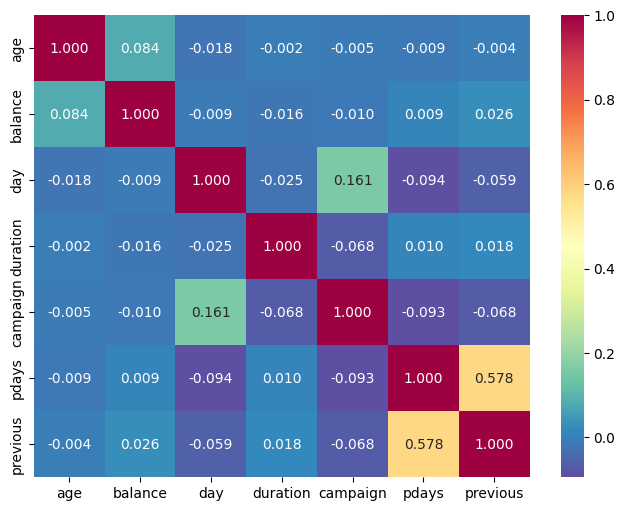

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(corr, fmt = ".3f", annot = True, cmap = 'Spectral_r')
plt.show()

Grouping Marital Status With Educational Level

In [ ]:
bank['marital/education'] = np.nan
lst = [bank]

for col in lst:
    col.loc[(col['marital'] == 'single') & (bank['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (bank['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (bank['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (bank['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (bank['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (bank['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (bank['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (bank['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (bank['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'


bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital/education
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,married/primary
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,married/secondary
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,single/tertiary
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,married/tertiary
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,married/secondary


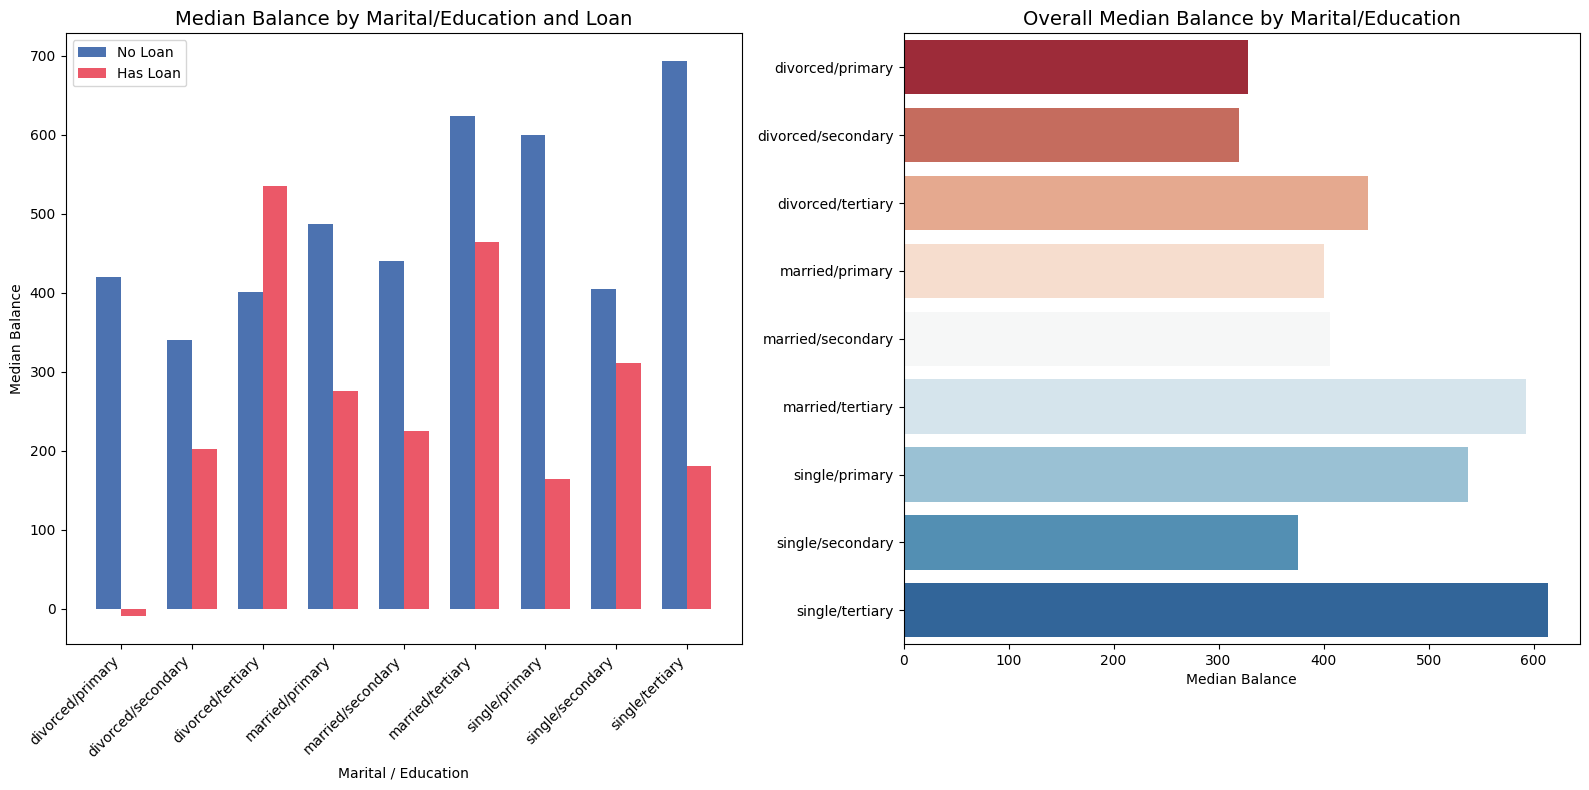

In [ ]:
# Grouping the data
education_groups = bank.groupby(['marital/education'], as_index=False)['balance'].median()

loan_balance = bank.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()
pivot_df = loan_balance.pivot(index='marital/education', columns='loan', values='balance').fillna(0)
pivot_df = pivot_df.sort_index()


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

#  Grouped bars by loan status
x = np.arange(len(pivot_df))
width = 0.35

ax[0].bar(x - width/2, pivot_df['no'], width, label='No Loan', color="#4C72B0")
ax[0].bar(x + width/2, pivot_df['yes'], width, label='Has Loan', color="#EB5868")

ax[0].set_title('Median Balance by Marital/Education and Loan', fontsize=14)
ax[0].set_xlabel('Marital / Education')
ax[0].set_ylabel('Median Balance')
ax[0].set_xticks(x)
ax[0].set_xticklabels(pivot_df.index, rotation=45, ha='right')
ax[0].legend()

#  Overall median balance
sns.barplot(x="balance", y="marital/education", data=education_groups,
            palette="RdBu", ax=ax[1])
ax[1].set_title('Overall Median Balance by Marital/Education', fontsize=14)
ax[1].set_xlabel('Median Balance')
ax[1].set_ylabel('')  # Avoid duplicate y-axis label

plt.tight_layout()
plt.show()


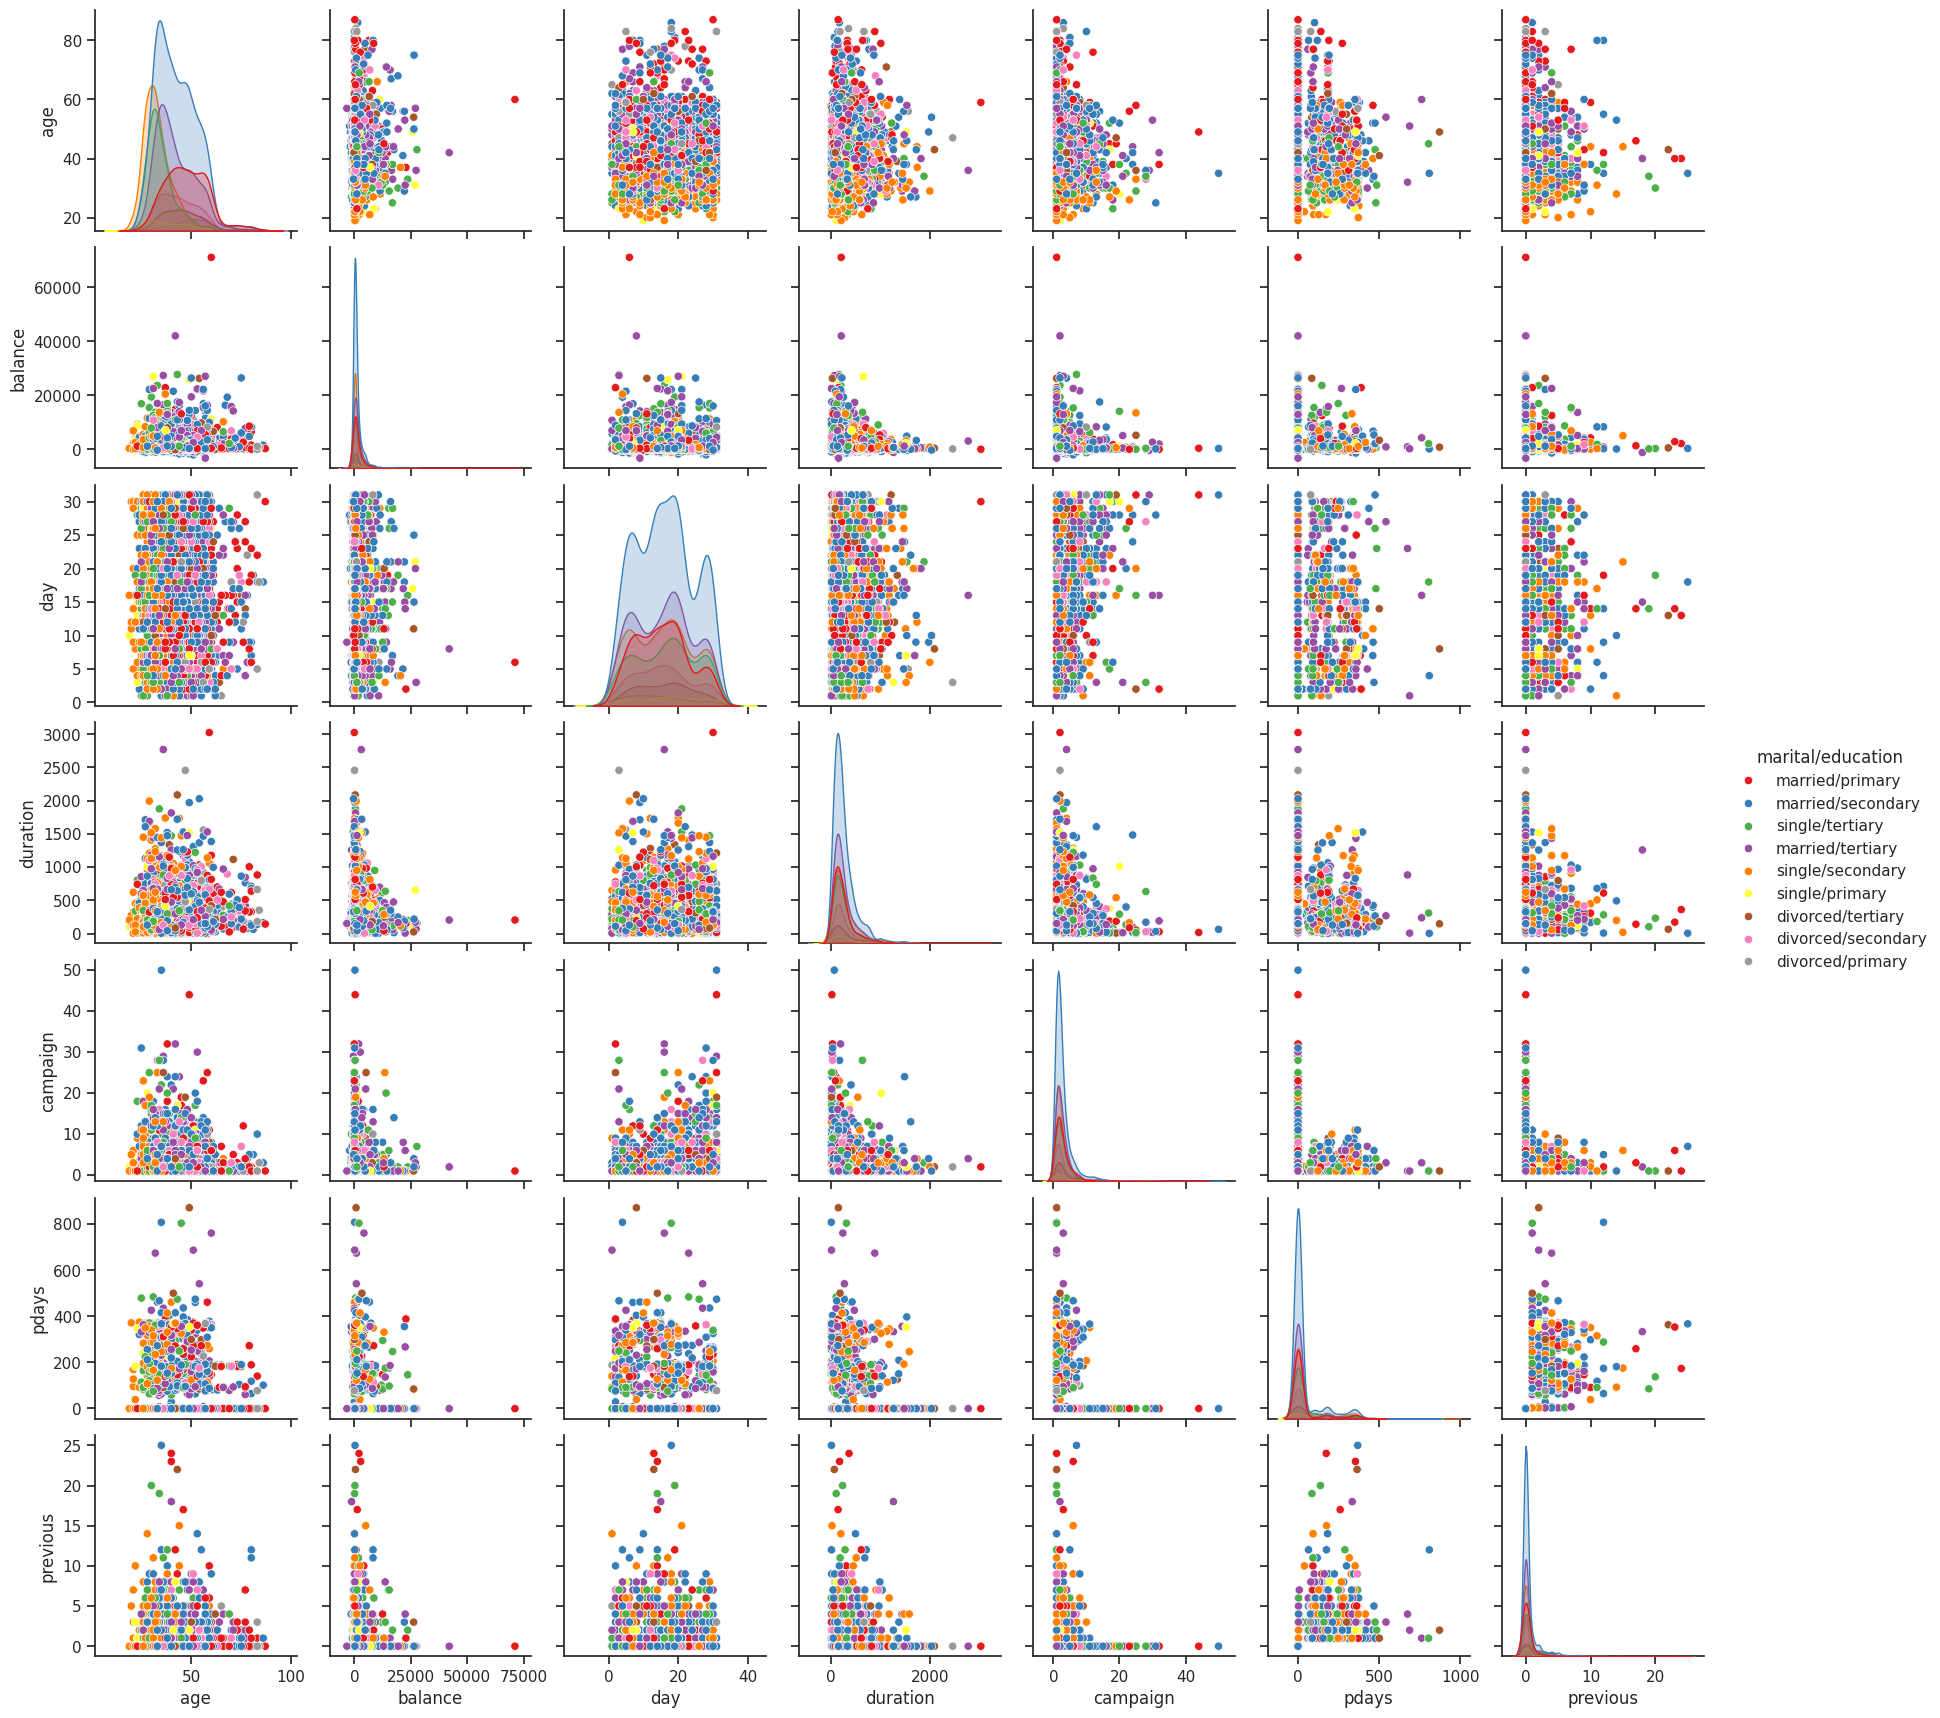

In [ ]:
sns.set(style="ticks")

sns.pairplot(bank, hue="marital/education", palette="Set1")
plt.show()

## Data Preprocessing

In [ ]:
X= bank.drop(columns='y')
y= bank['y']
print(X.shape)
print(y.shape)

(4521, 17)
(4521,)


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42,stratify= y)
# Apply one-hot encoding to categorical columns in X_train and X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


Scaling and Transformation

In [ ]:
#Apply Standard Scalar and PCA to the X_train and X_test
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

pca = PCA(n_components = 2)
pca.fit(scaled_X_train)
pca.fit(scaled_X_test)
pca_components_train = pca.fit_transform(X_train)
pca_components_test = pca.fit_transform(X_test)

print("PCA components for training data shape:", pca_components_train.shape)
print("PCA components for testing data shape:", pca_components_test.shape)

PCA components for training data shape: (3390, 2)
PCA components for testing data shape: (1131, 2)


Dummy Classifier

In [ ]:
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

dummy score: 0.89


SVC

In [ ]:
pipe1 = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])

pipe1.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe1.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe1.score(X_test, y_test)))
y_pred = pipe1.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.93
Test score: 0.88
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      1001
         yes       0.47      0.17      0.25       130

    accuracy                           0.88      1131
   macro avg       0.68      0.57      0.59      1131
weighted avg       0.85      0.88      0.86      1131



Logistic Regression

In [ ]:
pipe2 = Pipeline([("scaler", StandardScaler()), ("log_reg", LogisticRegression())])

pipe2.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe2.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe2.score(X_test, y_test)))
y_pred = pipe2.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.91
Test score: 0.90
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      1001
         yes       0.62      0.32      0.42       130

    accuracy                           0.90      1131
   macro avg       0.77      0.65      0.68      1131
weighted avg       0.88      0.90      0.88      1131



KNN

In [ ]:
pipe3 = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

pipe3.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe3.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe3.score(X_test, y_test)))

y_pred = pipe3.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.91
Test score: 0.88
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.97      0.93      1001
         yes       0.41      0.15      0.22       130

    accuracy                           0.88      1131
   macro avg       0.65      0.56      0.58      1131
weighted avg       0.84      0.88      0.85      1131



Random Forest

In [ ]:
rfc= RandomForestClassifier(n_estimators=200,
    max_depth=9)
rfc.fit(X_train,y_train)
print("Train score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Test score: {:.2f}".format(rfc.score(X_test, y_test)))
y_pred = rfc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.94
Test score: 0.89
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      1001
         yes       0.55      0.14      0.22       130

    accuracy                           0.89      1131
   macro avg       0.72      0.56      0.58      1131
weighted avg       0.86      0.89      0.86      1131



In [ ]:
pipe4 = Pipeline([("scaler", StandardScaler()), ("rfc", RandomForestClassifier(n_estimators=200,
    max_depth=9))])

pipe4.fit(X_train, y_train)

print("Train score: {:.2f}".format(pipe4.score(X_train, y_train)))
print("Test score: {:.2f}".format(pipe4.score(X_test, y_test)))
y_pred = pipe4.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Train score: 0.94
Test score: 0.89
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      1001
         yes       0.52      0.12      0.20       130

    accuracy                           0.89      1131
   macro avg       0.71      0.55      0.57      1131
weighted avg       0.85      0.89      0.85      1131



Building Pipelines

In [ ]:
 # Create pipelines for each model
pipelines = {
    'SVC': Pipeline([("scaler", StandardScaler()), ("SVC", SVC(probability=True))]),
    'Logistic Regression': Pipeline([("scaler", StandardScaler()), ("Logistic Regression", LogisticRegression())]),
    'KNN': Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    'Random Forest': Pipeline([("scaler", StandardScaler()), ("Random Forest", RandomForestClassifier())]), 'Naive Bayes': Pipeline([("scaler", StandardScaler()), ("Naive Bayes", GaussianNB())]),
    'XGBoost':Pipeline([("scaler", StandardScaler()), ("XGBoost", XGBClassifier(seed = 42))]),
    'AdaBoost':Pipeline([("scaler", StandardScaler()), ("AdaBoost", AdaBoostClassifier())]),
    'CatBoost':Pipeline([("scaler", StandardScaler()), ("CatBoost", CatBoostClassifier())]),
    'Gradient Boost':Pipeline([("scaler", StandardScaler()), ("Gradient Boost", GradientBoostingClassifier())])
}

Model Building

In [ ]:
# Define the evaluation function
def evaluate_pipeline(pipeline, X_train, X_test, y_train_encoded, y_test_encoded):
   y_train_pred = pipeline.predict(X_train)
   y_test_pred = pipeline.predict(X_test)

   train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
   test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
   train_f1_score = f1_score(y_train_encoded, y_train_pred, pos_label=1)
   test_f1_score = f1_score(y_test_encoded, y_test_pred, pos_label=1)

    # Compute confusion matrix for test data
   cm = confusion_matrix(y_test_encoded, y_test_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
   plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])
   plt.title('Confusion Matrix (Test Data)')
   plt.show()



   return train_accuracy, test_accuracy, train_f1_score, test_f1_score, cm


Hyper-Parameter Tuning


In [ ]:
# Define parameter grids for GridSearchCV
param_grids = {
     'SVC': {'SVC__C': [0.1, 1, 10], 'SVC__gamma': [0.001, 0.01, 0.1]},
    'Logistic Regression': {'Logistic Regression__C': [0.1, 1, 10]},
    'KNN': {'KNN__n_neighbors': [3, 5, 7, 9]},
    'Random Forest': {'Random Forest__n_estimators': [50, 100, 200], 'Random Forest__max_depth': [3, 5, 7, 9,10,12]},
    'Naive Bayes': {'Naive Bayes__var_smoothing': [1e-9, 1e-8, 1e-7]},
    'XGBoost': {'XGBoost__n_estimators': [50, 100, 200], 'XGBoost__learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'AdaBoost__n_estimators': [50, 100, 200], 'AdaBoost__learning_rate': [0.01, 0.1, 0.2]},
    'CatBoost': {'CatBoost__n_estimators':[50, 100, 200], 'CatBoost__learning_rate': [0.01, 0.05, 0.1],
    'CatBoost__max_depth': [4, 6, 8]},
    'Gradient Boost': {'Gradient Boost__n_estimators': [50, 100, 200],
    'Gradient Boost__learning_rate': [0.01, 0.05, 0.1],
    'Gradient Boost__max_depth': [3, 5, 7]}
}

# Fit each pipeline and evaluate
results = []


In [ ]:
results

[]

In [ ]:
#Print the model names passed to GridSearchCV
print(f"Algorithms:")
for model, pipeline in pipelines.items():
    print(f"{model}")

Algorithms:
SVC
Logistic Regression
KNN
Random Forest
Naive Bayes
XGBoost
AdaBoost
CatBoost
Gradient Boost


In [ ]:
results1 = []

    f1_scorer = make_scorer(f1_score, average='binary')
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)

    best_pipeline = grid_search.best_estimator_
    print(f'Best Parameters: {grid_search.best_params_}')

    train_acc, test_acc, train_f1, test_f1 = evaluate_pipeline(best_pipeline, X_train, X_test, y_train, y_test)

## Model Comparison ##


In [ ]:

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


Model: SVC
Fitting 5 folds for each of 9 candidates, totalling 45 fits


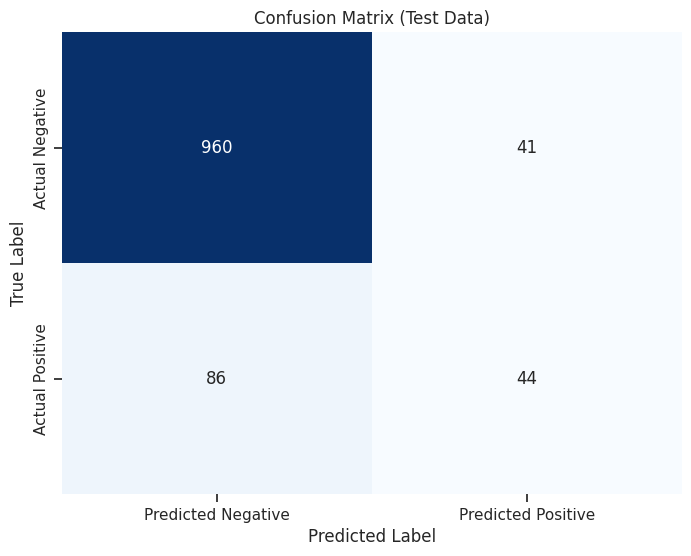

Train Accuracy: 0.9631
Test Accuracy: 0.8877
Train F1 Score: 0.8137
Test F1 Score: 0.4093
Confusion Matrix:
 [[960  41]
 [ 86  44]]

Model: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits


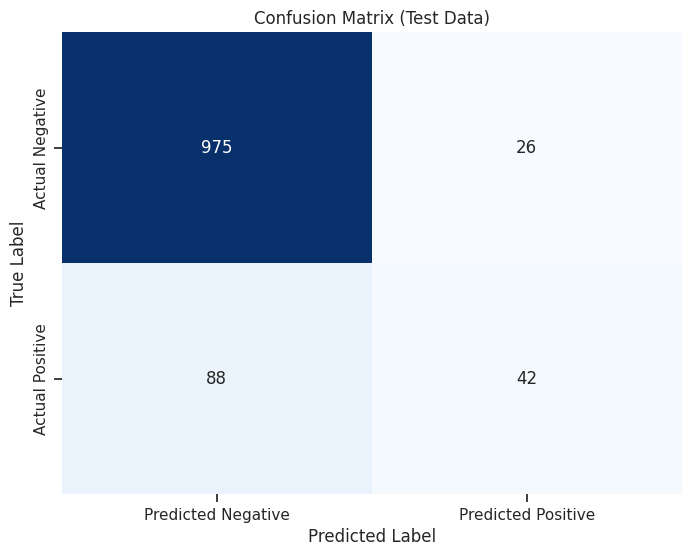

Train Accuracy: 0.9086
Test Accuracy: 0.8992
Train F1 Score: 0.4850
Test F1 Score: 0.4242
Confusion Matrix:
 [[975  26]
 [ 88  42]]

Model: KNN
Fitting 5 folds for each of 4 candidates, totalling 20 fits


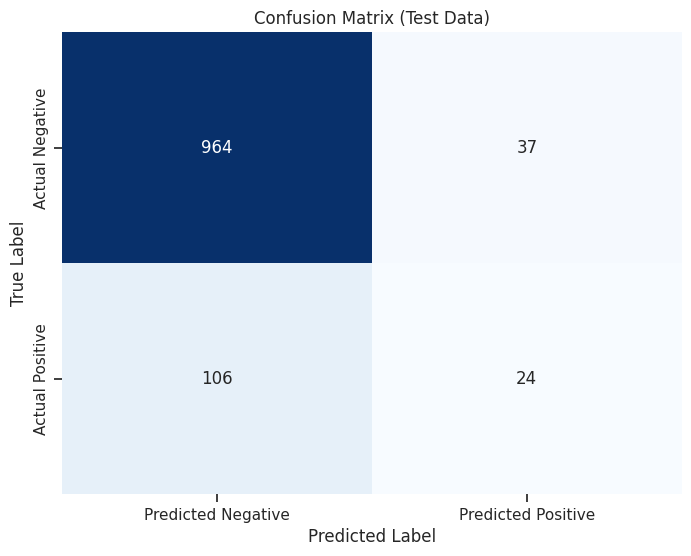

Train Accuracy: 0.9274
Test Accuracy: 0.8736
Train F1 Score: 0.5967
Test F1 Score: 0.2513
Confusion Matrix:
 [[964  37]
 [106  24]]

Model: Random Forest
Fitting 5 folds for each of 18 candidates, totalling 90 fits


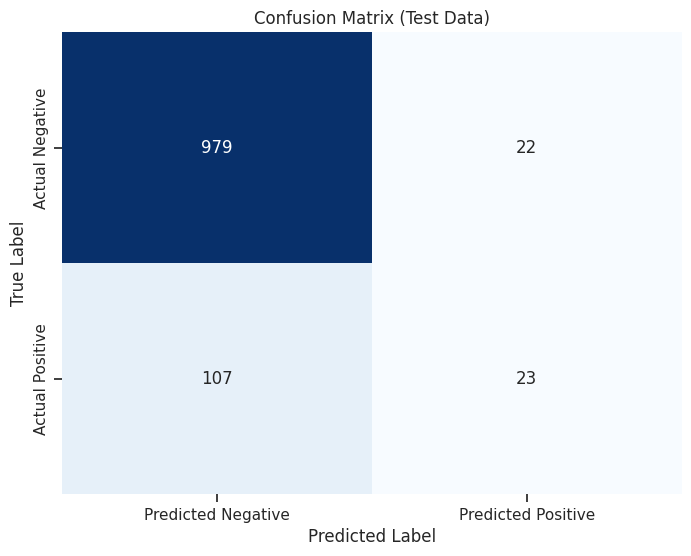

Train Accuracy: 0.9643
Test Accuracy: 0.8859
Train F1 Score: 0.8169
Test F1 Score: 0.2629
Confusion Matrix:
 [[979  22]
 [107  23]]

Model: Naive Bayes
Fitting 5 folds for each of 3 candidates, totalling 15 fits


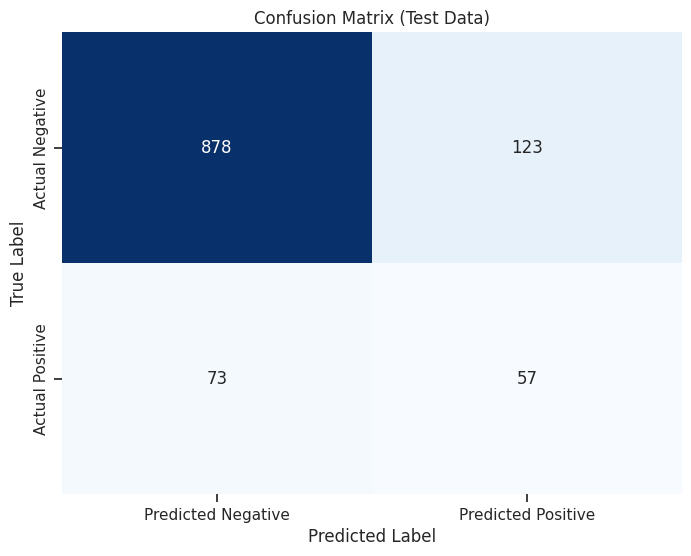

Train Accuracy: 0.8602
Test Accuracy: 0.8267
Train F1 Score: 0.4344
Test F1 Score: 0.3677
Confusion Matrix:
 [[878 123]
 [ 73  57]]

Model: XGBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


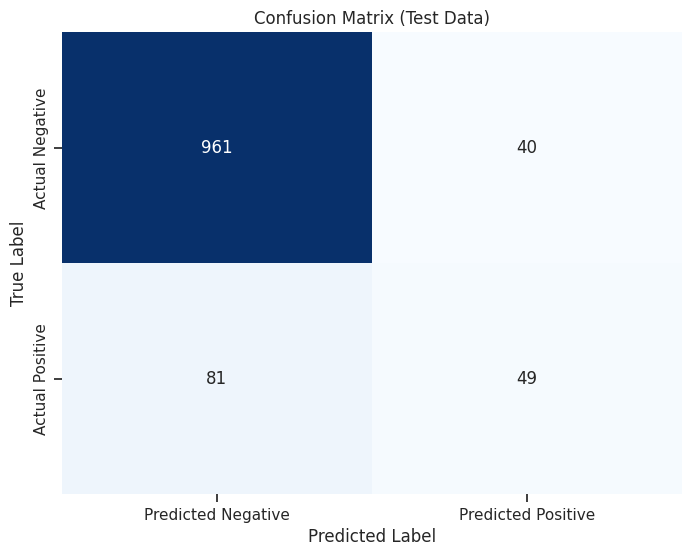

Train Accuracy: 1.0000
Test Accuracy: 0.8930
Train F1 Score: 1.0000
Test F1 Score: 0.4475
Confusion Matrix:
 [[961  40]
 [ 81  49]]

Model: AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


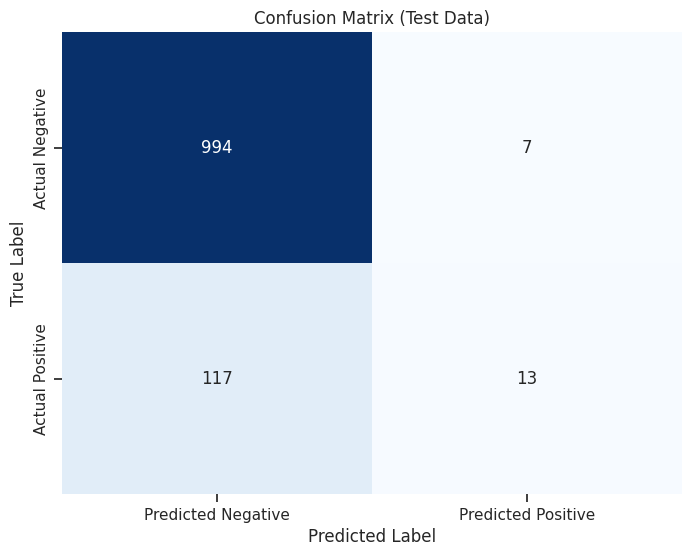

Train Accuracy: 0.8912
Test Accuracy: 0.8904
Train F1 Score: 0.1996
Test F1 Score: 0.1733
Confusion Matrix:
 [[994   7]
 [117  13]]

Model: CatBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.5914150	total: 48.4ms	remaining: 9.63s
1:	learn: 0.5218202	total: 50.3ms	remaining: 4.97s
2:	learn: 0.4592851	total: 52ms	remaining: 3.42s
3:	learn: 0.4249466	total: 53.8ms	remaining: 2.64s
4:	learn: 0.3884774	total: 55.6ms	remaining: 2.17s
5:	learn: 0.3553487	total: 57.5ms	remaining: 1.86s
6:	learn: 0.3396724	total: 59.3ms	remaining: 1.63s
7:	learn: 0.3236103	total: 61ms	remaining: 1.46s
8:	learn: 0.3081839	total: 62.8ms	remaining: 1.33s
9:	learn: 0.2968188	total: 64.6ms	remaining: 1.23s
10:	learn: 0.2866947	total: 66.3ms	remaining: 1.14s
11:	learn: 0.2764707	total: 67.8ms	remaining: 1.06s
12:	learn: 0.2711405	total: 69.6ms	remaining: 1s
13:	learn: 0.2665056	total: 71.4ms	remaining: 948ms
14:	learn: 0.2630848	total: 73.1ms	remaining: 902ms
15:	learn: 0.2591627	total

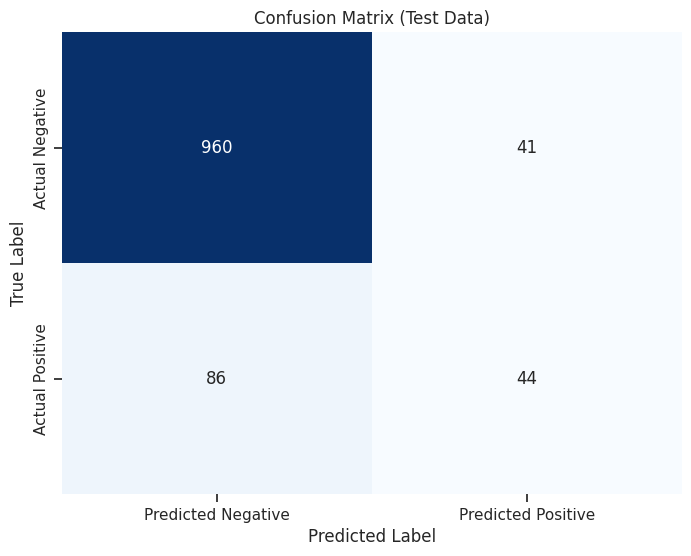

Train Accuracy: 0.9543
Test Accuracy: 0.8877
Train F1 Score: 0.7662
Test F1 Score: 0.4093
Confusion Matrix:
 [[960  41]
 [ 86  44]]

Model: Gradient Boost
Fitting 5 folds for each of 27 candidates, totalling 135 fits


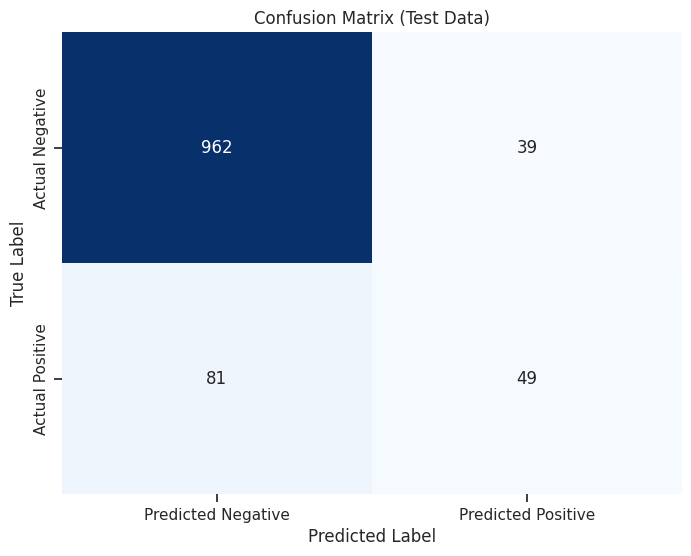

Train Accuracy: 0.9608
Test Accuracy: 0.8939
Train F1 Score: 0.8012
Test F1 Score: 0.4495
Confusion Matrix:
 [[962  39]
 [ 81  49]]


In [ ]:
# Using Grid search to find the best hyperparameter for each model
for name, pipeline in pipelines.items():
    print(f'\nModel: {name}')

    # Define F1 score as the metric for evaluation
    f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring=f1_scorer, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train_encoded)

    best_pipeline = grid_search.best_estimator_
    train_score = best_pipeline.score(X_train, y_train_encoded)
    test_score = best_pipeline.score(X_test, y_test_encoded)
    y_pred = best_pipeline.predict(X_test)

    # Evaluate pipeline including confusion matrix
    train_acc, test_acc, train_f1, test_f1, cm = evaluate_pipeline(best_pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

    results1.append({
        'Model': name,
        'Best Params': grid_search.best_params_,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1,
        'Confusion Matrix': cm
    })

    print(f'Train Accuracy: {train_acc:.4f}')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Train F1 Score: {train_f1:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print('Confusion Matrix:\n', cm)

In [ ]:

# List of classifiers as tuples
classifiers = [
    ('SVC', SVC()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('AdaBoost', AdaBoostClassifier()),
    ('CatBoost', cb(verbose=0)),
    ('Gradient Boost', GradientBoostingClassifier())
]

# Initialize the results DataFrame
models_df = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])

# Fit and score each classifier
for name, model in classifiers:
    model.fit(X_train, y_train_encoded)
    train_score = model.score(X_train, y_train_encoded)
    test_score = model.score(X_test, y_test_encoded)

    models_df.loc[len(models_df)] = {
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score
    }

# Sort by test score in descending order
models_df = models_df.sort_values(by='Test Score', ascending=False).reset_index(drop=True)

print(models_df)

                 Model  Train Score  Test Score
0              XGBoost     1.000000    0.898320
1       Gradient Boost     0.941003    0.893899
2             CatBoost     0.975516    0.893015
3        Random Forest     1.000000    0.891247
4             AdaBoost     0.901770    0.890363
5  Logistic Regression     0.905605    0.888594
6                  SVC     0.884661    0.885057
7                  KNN     0.901475    0.878868
8          Naive Bayes     0.858702    0.821397
